# Numpy Exercise 4

## Imports

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Complete graph Laplacian

In discrete mathematics a [Graph](http://en.wikipedia.org/wiki/Graph_%28mathematics%29) is a set of *vertices* or *nodes* that are connected to each other by *edges* or *lines*. If those *edges* don't have directionality, the graph is said to be *undirected*. Graphs are used to model social and communications networks (Twitter, Facebook, Internet) as well as natural systems such as molecules.

A [Complete Graph](http://en.wikipedia.org/wiki/Complete_graph), $K_n$ on $n$ nodes has an edge that connects each node to every other node.

Here is $K_5$:

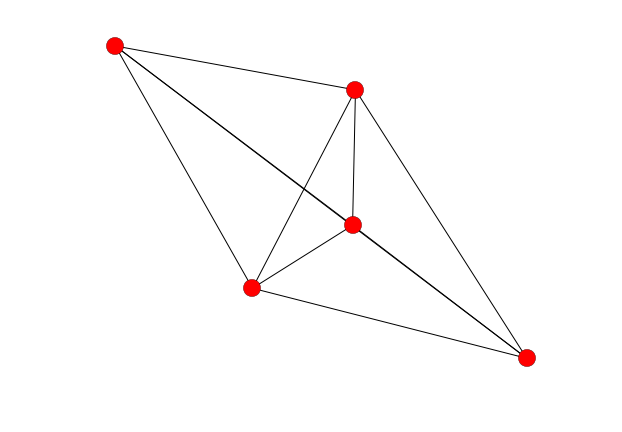

In [3]:
import networkx as nx
K_5=nx.complete_graph(5)
nx.draw(K_5)

The [Laplacian Matrix](http://en.wikipedia.org/wiki/Laplacian_matrix) is a matrix that is extremely important in graph theory and numerical analysis. It is defined as $L=D-A$. Where $D$ is the degree matrix and $A$ is the adjecency matrix. For the purpose of this problem you don't need to understand the details of these matrices, although their definitions are relatively simple.

The degree matrix for $K_n$ is an $n \times n$ diagonal matrix with the value $n-1$ along the diagonal and zeros everywhere else. Write a function to compute the degree matrix for $K_n$ using NumPy.

In [9]:
def complete_deg(n):
    """Return the integer valued degree matrix D for the complete graph K_n."""
    a = np.zeros((n,n))
    b = a.astype(dtype=np.int)
    for x in range(n):
        b[x,x] = n-1
    return b


In [10]:
D = complete_deg(5)
assert D.shape==(5,5)
assert D.dtype==np.dtype(int)
assert np.all(D.diagonal()==4*np.ones(5))
assert np.all(D-np.diag(D.diagonal())==np.zeros((5,5),dtype=int))

The adjacency matrix for $K_n$ is an $n \times n$ matrix with zeros along the diagonal and ones everywhere else. Write a function to compute the adjacency matrix for $K_n$ using NumPy.

In [11]:
def complete_adj(n):
    """Return the integer valued adjacency matrix A for the complete graph K_n."""
    a = np.ones((n,n))
    b = a.astype(dtype=np.int)
    for x in range(n):
        b[x,x] = 0
    return b

In [12]:
A = complete_adj(5)
assert A.shape==(5,5)
assert A.dtype==np.dtype(int)
assert np.all(A+np.eye(5,dtype=int)==np.ones((5,5),dtype=int))

Use NumPy to explore the eigenvalues or *spectrum* of the Laplacian *L* of $K_n$. What patterns do you notice as $n$ changes? Create a *conjecture* about the general Laplace *spectrum* of $K_n$.

In [19]:
def laplacian(n):
    return complete_deg(n)-complete_adj(n)

one    = laplacian(1)
two    = laplacian(2)
three  = laplacian(3)
four   = laplacian(4)
ten    = laplacian(10)
five   = laplacian(5)

print(one)
print(np.linalg.eigvals(one))
print(two)
print(np.linalg.eigvals(two))
print(three)
print(np.linalg.eigvals(three))
print(four)
print(np.linalg.eigvals(four))
print(five)
print(np.linalg.eigvals(five))
print(ten)
print(np.linalg.eigvals(ten))



[[0]]
[ 0.]
[[ 1 -1]
 [-1  1]]
[ 2.  0.]
[[ 2 -1 -1]
 [-1  2 -1]
 [-1 -1  2]]
[  3.00000000e+00  -4.44089210e-16   3.00000000e+00]
[[ 3 -1 -1 -1]
 [-1  3 -1 -1]
 [-1 -1  3 -1]
 [-1 -1 -1  3]]
[  4.00000000e+00  -1.11022302e-16   4.00000000e+00   4.00000000e+00]
[[ 4 -1 -1 -1 -1]
 [-1  4 -1 -1 -1]
 [-1 -1  4 -1 -1]
 [-1 -1 -1  4 -1]
 [-1 -1 -1 -1  4]]
[ 5.  0.  5.  5.  5.]
[[ 9 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1  9 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1  9 -1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1  9 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1  9 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1  9 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1  9 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1  9 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1  9 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1  9]]
[ 10.   0.  10.  10.  10.  10.  10.  10.  10.  10.]


In general there are two eigenvalues for the laplacian matrix, the first value being n with multiplicity n-1 and the second eigenvalue of multiplicity 1 being a very small negative number (for small n on the order of 10^-16) and as n increases the second eigenvalue gets closer and closer to zero. with the exception of n = 1 then the eigenvalue is just 0 